In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake_news_train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.shape

(20800, 5)

In [8]:
df = df.dropna()

In [10]:
df.shape

(18285, 5)

In [13]:
x = df.drop(['label'], axis= 1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [14]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
message = df.copy()

message.shape

(18285, 5)

In [16]:
message.reset_index(inplace= True)
message.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
message['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [19]:
## import all required libraries

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [20]:
stemmer = PorterStemmer()

In [21]:
import re

In [22]:
corpus =[]

for i in range(0, len(message)):
    
    review = re.sub('[^a-zA-Z]',' ',message['title'][i])
    
    review = review.lower()
    
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    
    corpus.append(review)

In [23]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [24]:
x.shape

(18285, 4)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 5000, ngram_range= (1,3))

In [26]:
x = cv.fit_transform(corpus).toarray()

In [27]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
x.shape

(18285, 5000)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, test_size= 0.3)

In [30]:
print(x_train.shape, x_test.shape)

(12799, 5000) (5486, 5000)


In [31]:
print(y_train.shape, y_test.shape)

(12799,) (5486,)


In [34]:
cv.get_feature_names()[20]

'accid'

In [36]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [37]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [39]:
## creating a new dataframe

count_df = pd.DataFrame(x_train, columns= cv.get_feature_names())

count_df.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial_NB

In [42]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
import numpy as np
import itertools

In [45]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [46]:
pred = classifier.predict(x_test)

In [48]:
score = accuracy_score(y_test, pred)

In [49]:
score

0.9017499088589136

accuracy:  0.902
Confusion matrix, without normalization


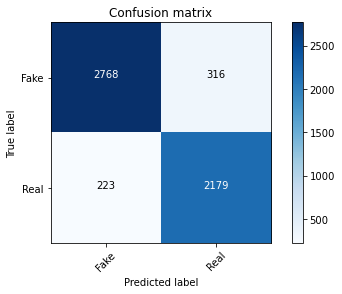

In [50]:
print('accuracy:  %0.3f' % score)
cm = confusion_matrix(y_test, pred)

plot_confusion_matrix(cm, classes= ['Fake','Real'])

# Multinomial Classifier with Hyperparameter

In [51]:
classifier = MultinomialNB(alpha= 0.1)

In [52]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    
    sub_classifier = MultinomialNB(alpha= alpha)
    
    sub_classifier.fit(x_train, y_train)
    
    y_pred = sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    if score > previous_score:
        classifier = sub_classifier
        
    print('Alpha = {} , Score = {}'.format(alpha,score))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha = 0.0 , Score = 0.8904484141450966
Alpha = 0.1 , Score = 0.9030258840685381
Alpha = 0.2 , Score = 0.9030258840685381
Alpha = 0.30000000000000004 , Score = 0.9026613197229311
Alpha = 0.4 , Score = 0.9019321910317171
Alpha = 0.5 , Score = 0.9024790375501276
Alpha = 0.6000000000000001 , Score = 0.9028436018957346
Alpha = 0.7000000000000001 , Score = 0.9035727305869486
Alpha = 0.8 , Score = 0.9030258840685381
Alpha = 0.9 , Score = 0.9032081662413416


from the above output we can choose the best alpha value for our model

In [53]:
## get feature name
feature_name = cv.get_feature_names()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
classifier.coef_[0]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.13851551,  -8.66088795,  -9.13851551, ..., -10.83311123,
        -8.7962293 ,  -9.36677416])

In [56]:
## Most real
sorted(zip(classifier.coef_[0], feature_name), reverse=True)[:20]

[(-3.9920894686099926, 'trump'),
 (-4.283778449404154, 'hillari'),
 (-4.375295545839294, 'clinton'),
 (-4.8873997935153906, 'elect'),
 (-5.144630412704637, 'new'),
 (-5.239226293337629, 'comment'),
 (-5.272857037363478, 'video'),
 (-5.400360096919867, 'war'),
 (-5.400360096919867, 'us'),
 (-5.400360096919867, 'hillari clinton'),
 (-5.434948525093684, 'fbi'),
 (-5.450146386003116, 'vote'),
 (-5.535349569997123, 'email'),
 (-5.592540682275724, 'world'),
 (-5.628494225203827, 'obama'),
 (-5.717782305845059, 'donald'),
 (-5.751706861626975, 'donald trump'),
 (-5.7656056260177895, 'russia'),
 (-5.868713801008469, 'day'),
 (-5.868713801008469, 'america')]

In [58]:
### Most fake
sorted(zip(classifier.coef_[0], feature_name))[:5000]

[(-10.833111226611438, 'abe'),
 (-10.833111226611438, 'abroad'),
 (-10.833111226611438, 'abus new'),
 (-10.833111226611438, 'abus new york'),
 (-10.833111226611438, 'act new'),
 (-10.833111226611438, 'act new york'),
 (-10.833111226611438, 'advic'),
 (-10.833111226611438, 'advis new'),
 (-10.833111226611438, 'advis new york'),
 (-10.833111226611438, 'age new'),
 (-10.833111226611438, 'age new york'),
 (-10.833111226611438, 'agenda breitbart'),
 (-10.833111226611438, 'ail'),
 (-10.833111226611438, 'aleppo new'),
 (-10.833111226611438, 'aleppo new york'),
 (-10.833111226611438, 'ali'),
 (-10.833111226611438, 'america breitbart'),
 (-10.833111226611438, 'america new york'),
 (-10.833111226611438, 'american breitbart'),
 (-10.833111226611438, 'american new'),
 (-10.833111226611438, 'american new york'),
 (-10.833111226611438, 'ami'),
 (-10.833111226611438, 'ami schumer'),
 (-10.833111226611438, 'amp'),
 (-10.833111226611438, 'applaud'),
 (-10.833111226611438, 'arson'),
 (-10.83311122661143